In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N=10
r=0.5

In [3]:
cart_pos = np.loadtxt("../athenak_versions/athenak_z4c_horizon/build/cart_pos.out")
g_dd = np.loadtxt("../athenak_versions/athenak_z4c_horizon/build/metric_on_sphere.out")
g_uu = np.loadtxt("../athenak_versions/athenak_z4c_horizon/build/metric_uu_on_sphere.out")
interp_indcs = np.loadtxt("../athenak_versions/athenak_z4c_horizon/build/interp_indcs.out")
dg_ddd = np.loadtxt("../athenak_versions/athenak_z4c_horizon/build/dg_on_sphere.out")
polar_pos = np.loadtxt("../athenak_versions/athenak_z4c_horizon/build/polar_pos.out")
#dF = np.loadtxt("../athenak_versions/athenak_z4c_horizon/build/dF_cart.out")
#Gamma_udd = np.loadtxt("../athenak_versions/athenak_z4c_horizon/build/Gamma_udd.out")

In [4]:
print(interp_indcs.shape)

(200, 4)


In [5]:
cart_pos = cart_pos.reshape(2*N,N,cart_pos.shape[-1])
polar_pos = polar_pos.reshape(2*N,N,polar_pos.shape[-1])

g_dd = g_dd.reshape(2*N,N,g_dd.shape[-1])
g_uu = g_uu.reshape(2*N,N,g_uu.shape[-1])
interp_indcs = interp_indcs.reshape(2*N,N,interp_indcs.shape[-1])
dg_ddd = dg_ddd.reshape(2*N,N,dg_ddd.shape[-1])
#dF = dF.reshape(2*N,N,dF.shape[-1])
#Gamma_udd = Gamma_udd.reshape(2*N,N,Gamma_udd.shape[-1])

In [6]:
x = cart_pos[:,:,0]
y = cart_pos[:,:,1]
z = cart_pos[:,:,2]
theta = polar_pos[:,:,0]
phi = polar_pos[:,:,1]

# Check x,y,z residual


In [7]:
def rx(theta,phi):
    return(np.sin(theta)*np.cos(phi))
def ry(theta,phi):
    return(np.sin(theta)*np.sin(phi))
def rz(theta,phi):
    return(np.cos(theta))

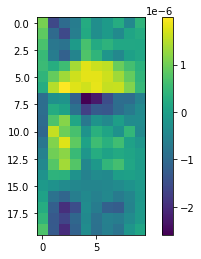

In [8]:
plt.imshow(x-r*rx(theta,phi))
plt.colorbar()

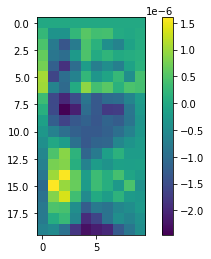

In [9]:
plt.imshow(y-r*ry(theta,phi))
plt.colorbar()

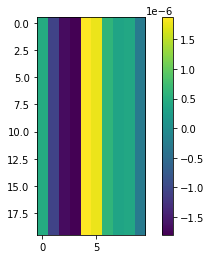

In [10]:
plt.imshow(z-r*rz(theta,phi))
plt.colorbar()

Interpolation indices

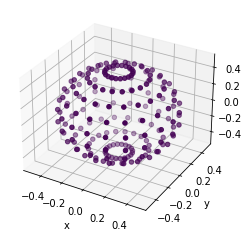

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z,c=interp_indcs[:,:,0])
plt.xlabel("x")
plt.ylabel("y")
plt.xlim()
plt.show()

In [12]:
plt.imshow(dF[:,:,0].T-rx(theta,phi).T)
plt.colorbar()

NameError: name 'dF' is not defined

In [13]:
plt.imshow(dF[:,:,1].T-ry(theta,phi).T)
plt.colorbar()

NameError: name 'dF' is not defined

In [14]:
plt.imshow(dF[:,:,2].T-rz(theta,phi).T)
plt.colorbar()

NameError: name 'dF' is not defined

In [15]:
def SYMM2_Ind(v1, v2):
    if (v1==0):
        return v2
    elif (v1==1):
        if (v2==0):
              return 1
        else:
              return v2+2
    else:
        if (v2==0):
            return 2
        else:
            return v2+3


In [16]:
dg_ddd.shape

(20, 10, 6)

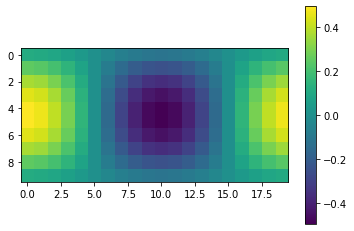

In [17]:
plt.imshow(cart_pos[:,:,0].T)
plt.colorbar()

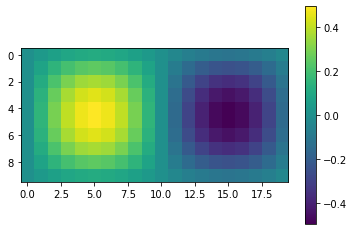

In [18]:
plt.imshow(cart_pos[:,:,1].T)
plt.colorbar()

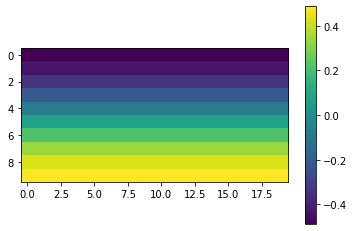

In [19]:
plt.imshow(cart_pos[:,:,2].T)
plt.colorbar()

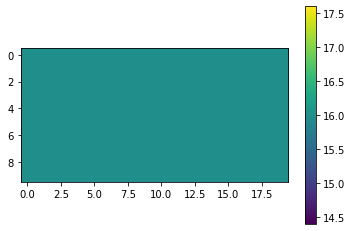

In [20]:
plt.imshow(g_dd[:,:,0].T)
plt.colorbar()

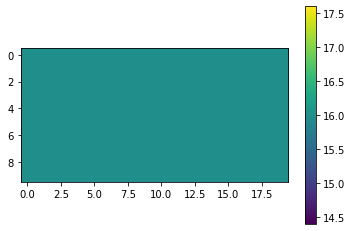

In [21]:
plt.imshow(g_dd[:,:,3].T)
plt.colorbar()

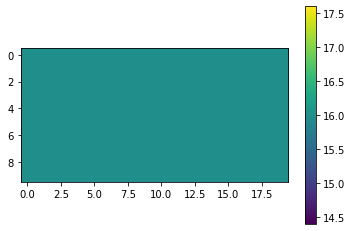

In [22]:
plt.imshow(g_dd[:,:,5].T)
plt.colorbar()

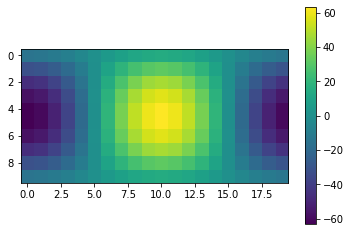

In [30]:
plt.imshow(dg_ddd[:,:,3].T)
plt.colorbar()

In [24]:
def Analytic_dz_gdd(x,y,z):
    return (-2.*z*(1 + 0.5/np.sqrt(x**2 + y**2 + z**2))**3)/(x**2 + y**2 + z**2)**1.5

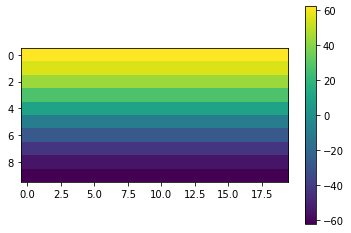

In [25]:
plt.imshow(Analytic_dz_gdd(x,y,z).T)
plt.colorbar()

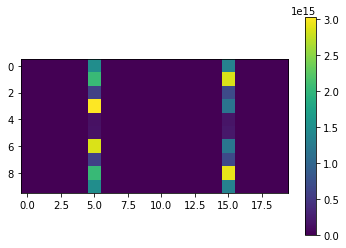

In [26]:
plt.imshow(np.abs(dg_ddd[:,:,0]-Analytic_dz_gdd(x,y,z)).T/np.abs(dg_ddd[:,:,0].T))
plt.colorbar()